In [23]:
import pandas as pd
import re
import os
import importlib
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')
import numpy as np
import importlib

import sys

project_root = '/Users/henrybaker/repositories/thesis_analysis'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Loading & Cleaning

In [24]:
csv_path = f"results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    2682
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Round 1: Verfifying FLOPs on raw df
NB: FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00 5.26385823e+13]
Original distribution:
flops
0.000000e+00       5
1.694997e+13      22
2.024862e+13    2265
5.263858e+13     390
Name: count, dtype: int64

Dominant FLOPs value: 20248623316992.0
- Affected rows count: 417
- Affected row indices: [0, 36, 155, 234, 283, 426, 548, 617, 630, 683, 719, 761, 904, 1000, 1051, 1246, 1294, 1392, 1485, 1531, 1631, 1779, 1815, 2038, 2071, 2214, 2239, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:611: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00 5.26385823e+13]
  if not verify_flops(df):
/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:621: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 5.26385823e+13]
  verify_flops(df)


# Exploratory Data Analysis (EDA)

📊 Plotting histogram...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


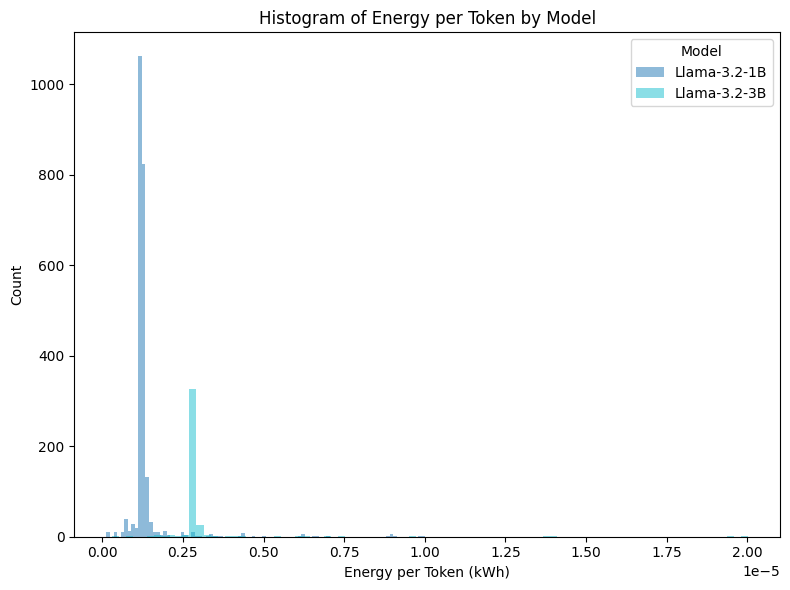

📦 Plotting boxplot...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))
/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, vert=False, patch_artist=True, labels=models)
/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:51: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  box = ax.boxplot(data, vert=False, patch_artist=True, labels=models)


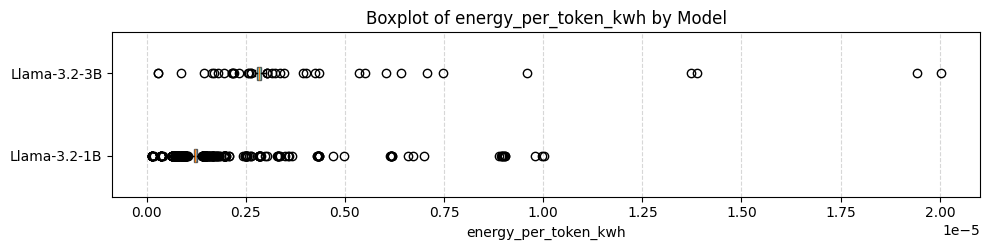

🔬 Scatter: by model...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


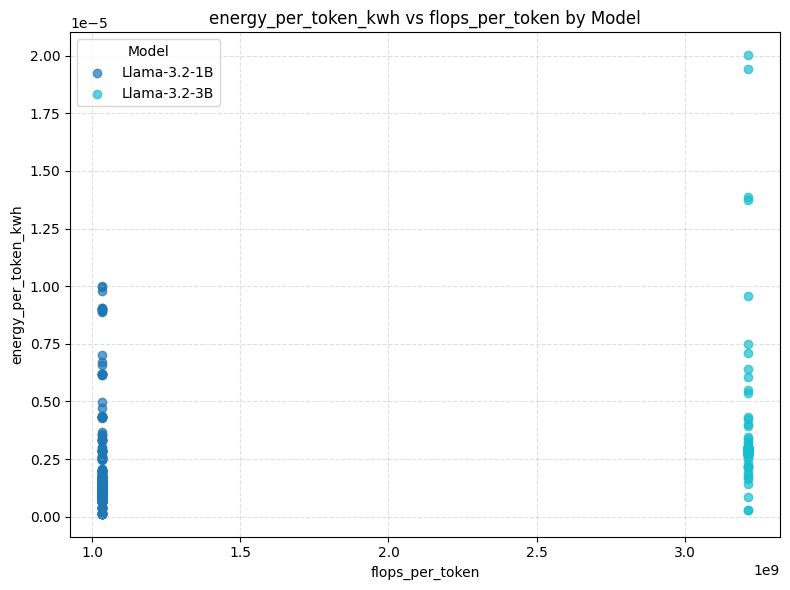

🔗 Correlation matrix...


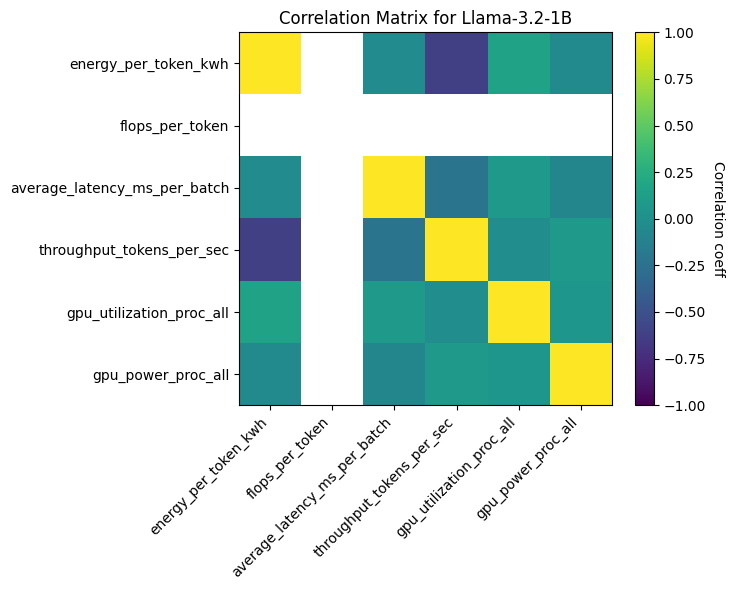

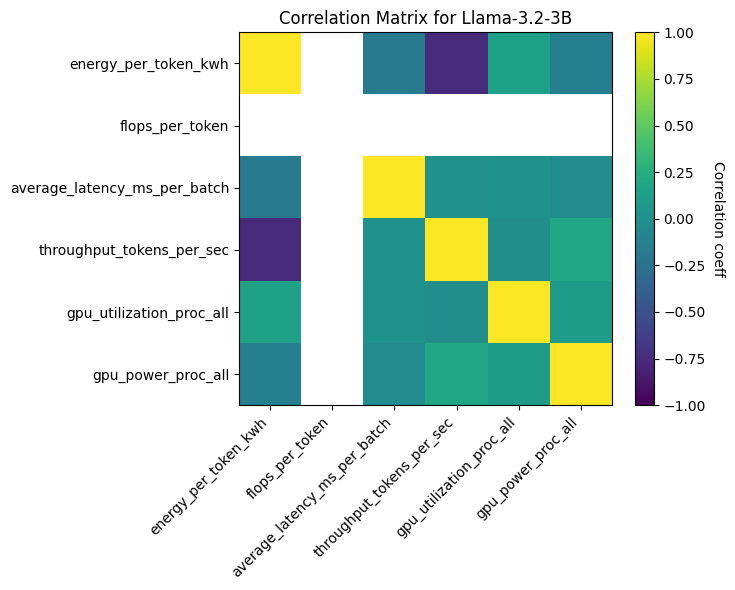

🔬 Scatter: Throughput vs energy...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


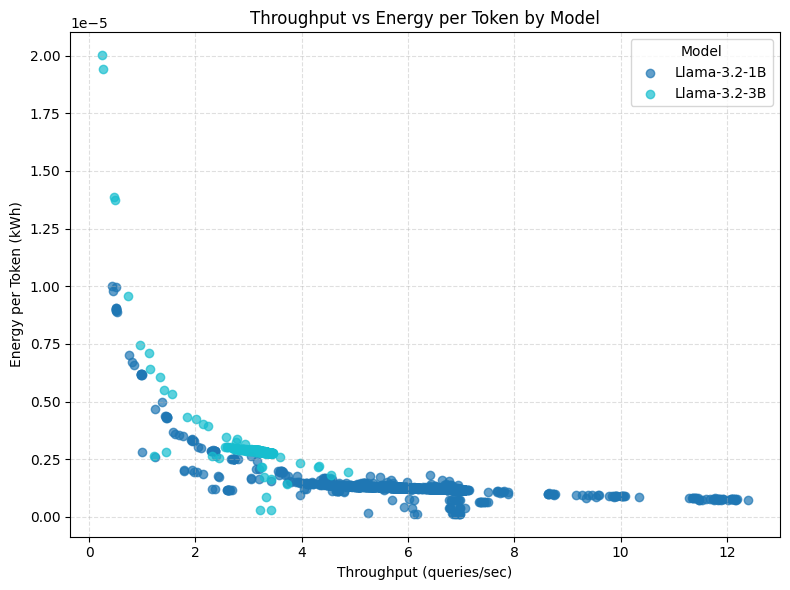

📈 Scatter: Divergence patterns...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


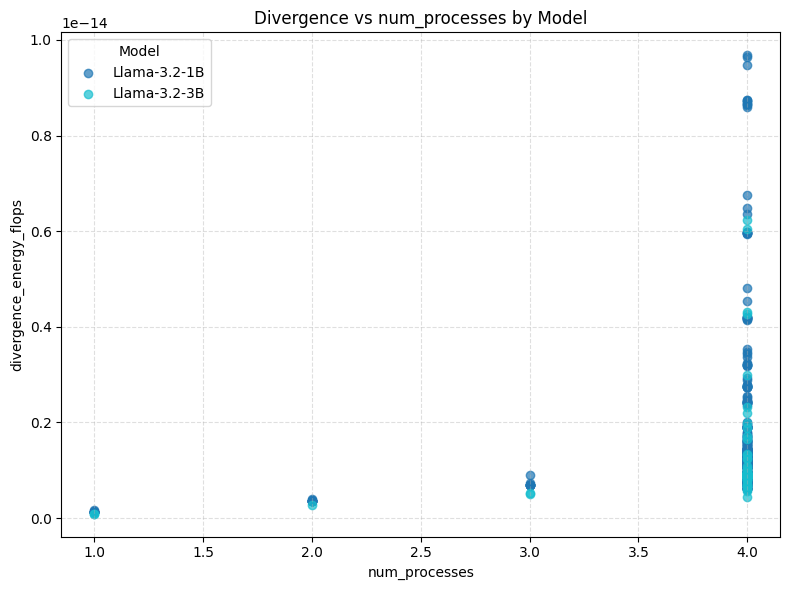

/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


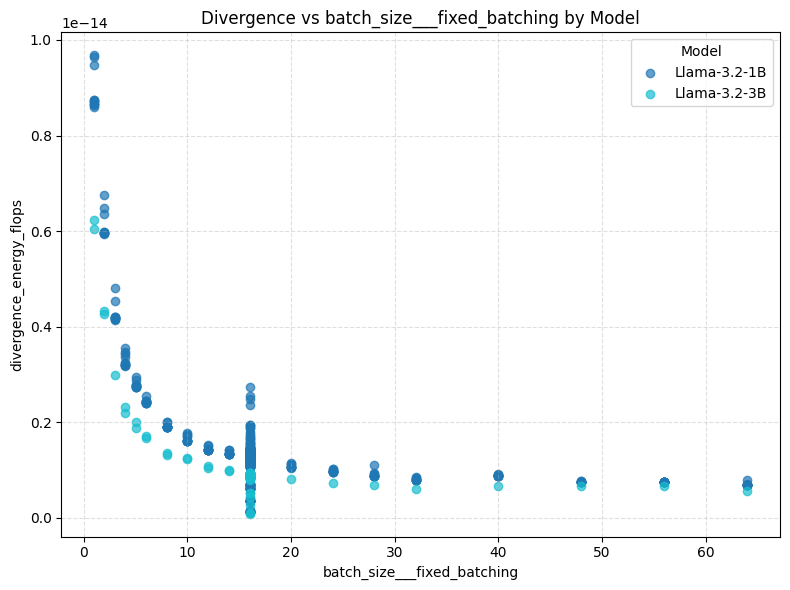

Skipping non-numeric column 'decoder_config_decoding_mode'


In [25]:
import scripts.b_exploratory_data_analysis as eda
importlib.reload(eda)

from scripts.b_exploratory_data_analysis import (
    plot_energy_histograms,
    plot_energy_boxplots,
    plot_throughput_vs_energy,
    plot_scatter_by_model,
    plot_divergence_by_model,
    plot_all_diagnostics
)

plot_all_diagnostics(df)

TO DO:
- [ ] do a proper grid search on both models-> be able to properly compare e.g. num processes against everything  at all levels!
- [ ] throughput is clearly important! plot it in each of the controlled plots !!!
- [ ] also print average_latency_ms_per_batch

outcome vars to plot across controlled vars
- [ ] energy_per_token_kwh_mean
- [ ] average_latency_ms_per_batch
- [ ] throughput_tokens_per_sec_mean

Then do as a full grid search -> don't filter the db, but print at all levels

# CONTROLLED EXPERIMENT PLOTS

These are different to the subsequent grid search plots, as we are ONLY varying one variable against a (somewhat arbitrary) baseline.

- currently it works on subsetted dfs, but once done grid search: get it to work on full df -> capture variance at diff points

- [ ] Normalise axes as z-scores
- [ ] if decoder temp remains a mess, print stratified by cycle
- [ ] on latency axis, print out the interval range!
- [ ] change normalised axes to say 'normalised to baseline'
- [ ] top p and k value normalised plots: the y axis does not have 'normalised'
- [x] add the baseline annotation BELOW the red dotted line
- [x] do as full grid search
- [x] FLOPs to be visually diff
- [x] decoder temp yaxis not normalising
- [x] remove the FLOPs line from the Deocder & Latency plots


In [26]:
configs = ['num_processes', 'batching','precis', 'decoding', 'latency']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}

## Number of Process plots

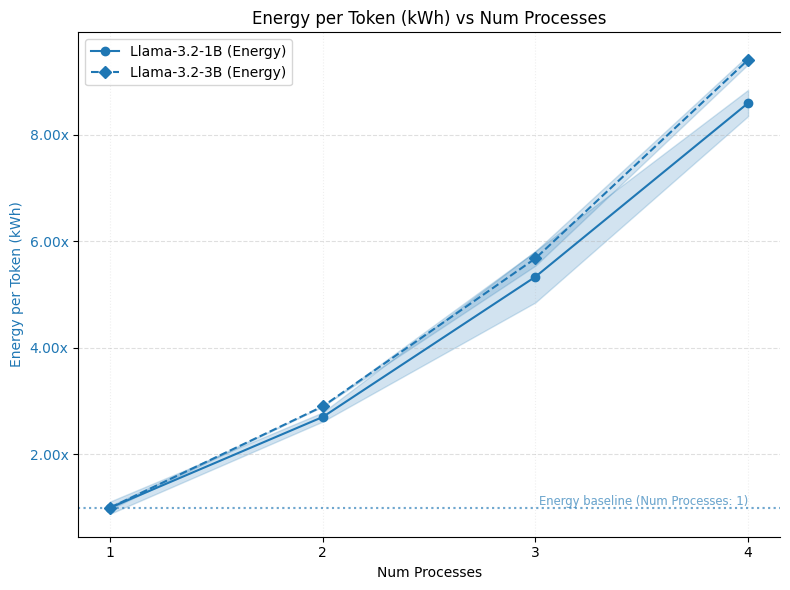

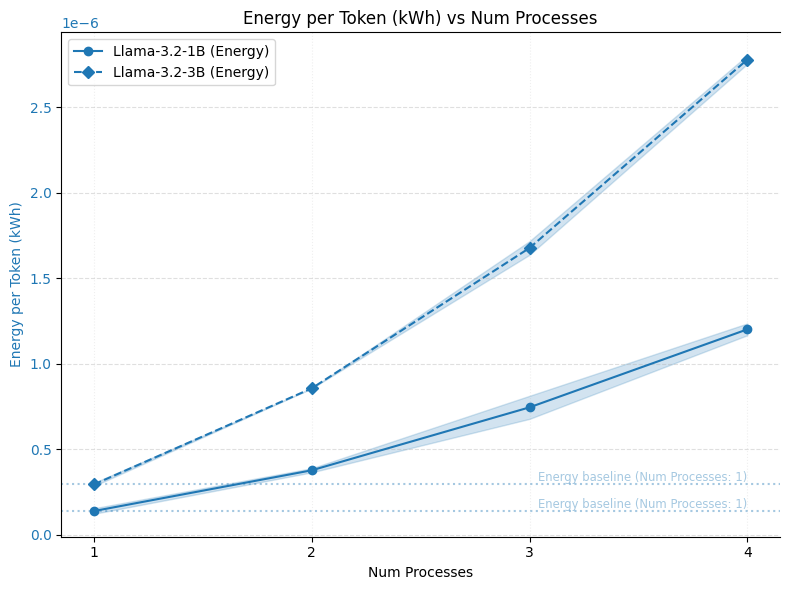

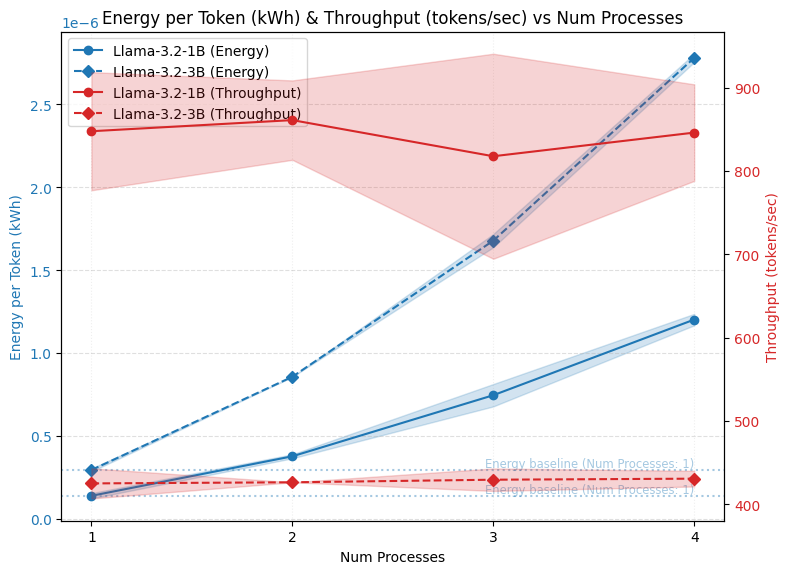

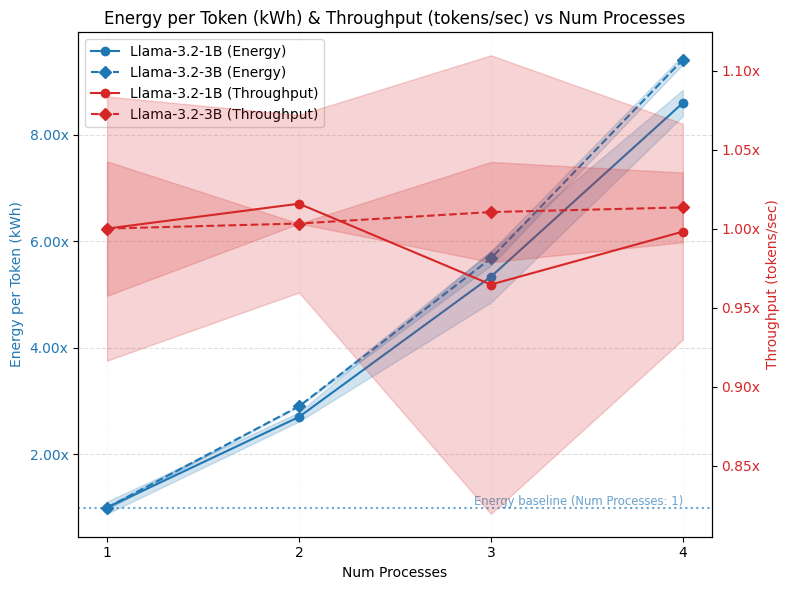

In [27]:
import scripts.c_vis_proc_precis_batch as viz
importlib.reload(viz)

from scripts.c_vis_proc_precis_batch import (
    plot_num_processes,
    plot_batching,
    plot_precision,
    #plot_decoder_temperature,
    #plot_decoder_topk,
    #plot_decoder_topp,
    #plot_latency_by_burst_size,
    #plot_latency_by_burst_interval,
)

# 1) Number of processes

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)



## Batching plots

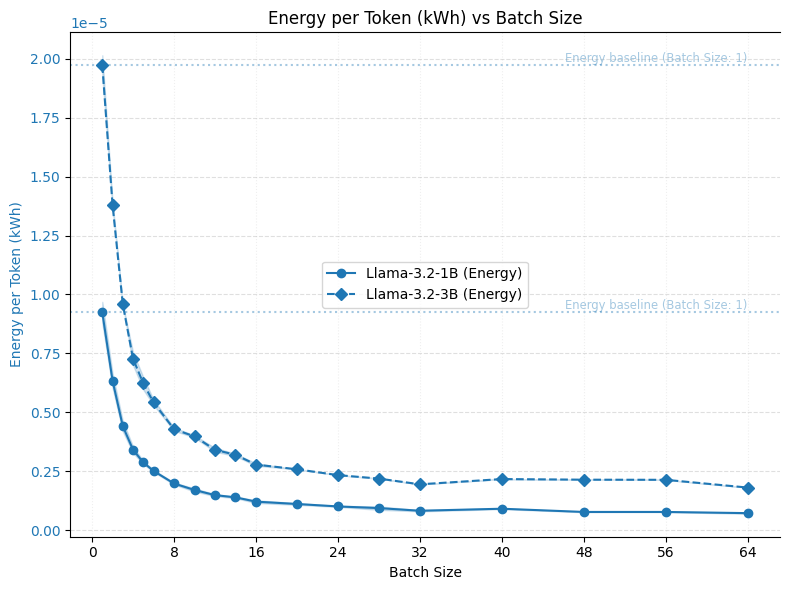

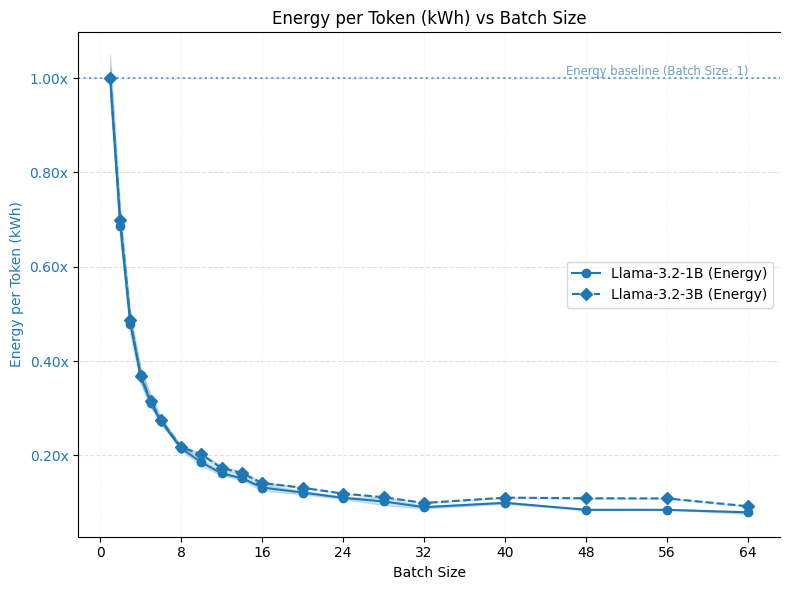

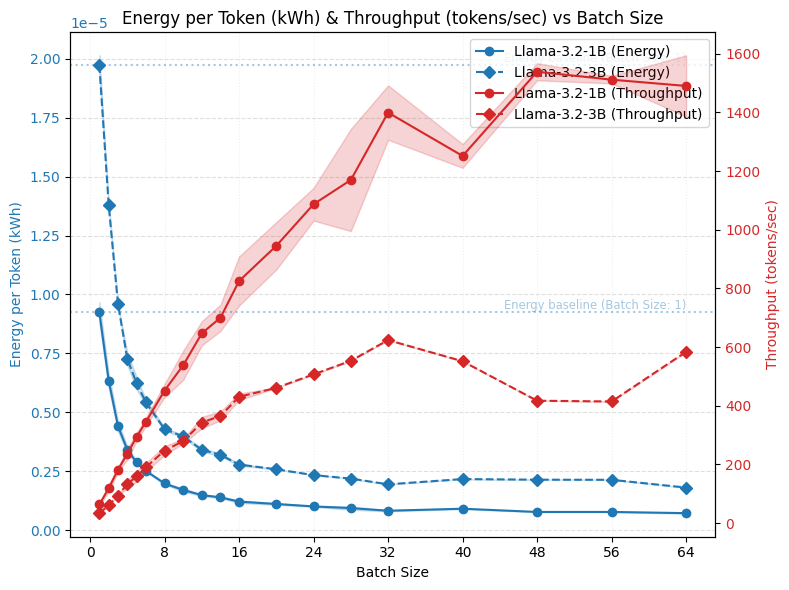

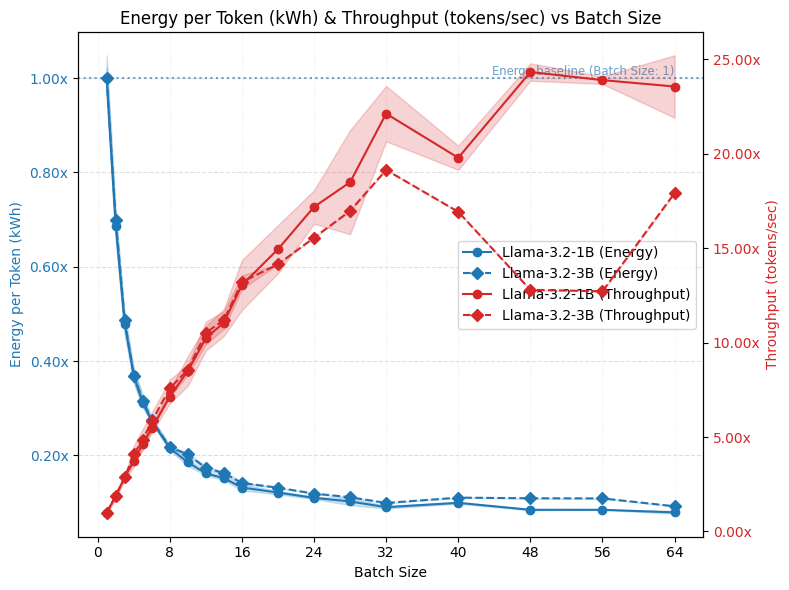

In [28]:
# 2) Batch size
plot_batching(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
    )

plot_batching(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
    )

plot_batching(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_batching(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)



## Precision plots

/Users/henrybaker/repositories/thesis_analysis/scripts/c_vis_proc_precis_batch.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats1 = sub.groupby(param_col)[metric_map[ax1]['col']].agg(['mean','std'])
/Users/henrybaker/repositories/thesis_analysis/scripts/c_vis_proc_precis_batch.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats1 = sub.groupby(param_col)[metric_map[ax1]['col']].agg(['mean','std'])


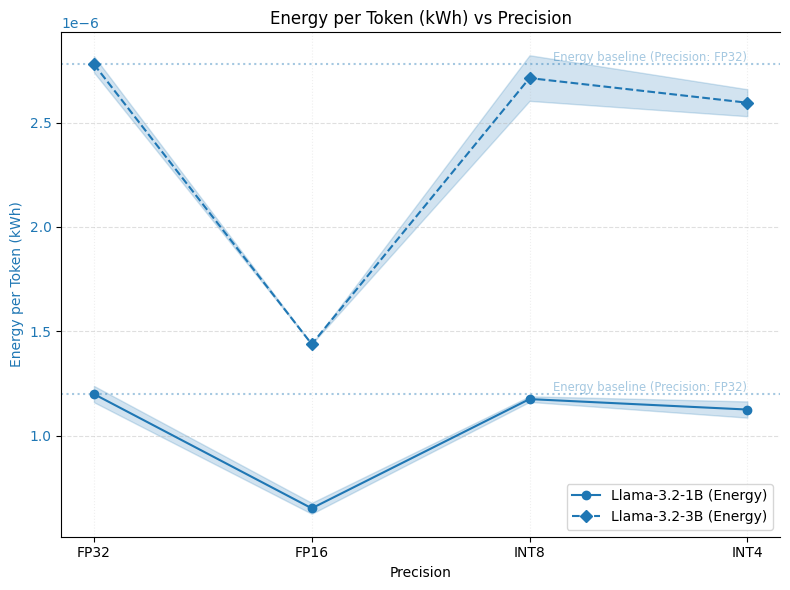

/Users/henrybaker/repositories/thesis_analysis/scripts/c_vis_proc_precis_batch.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats1 = sub.groupby(param_col)[metric_map[ax1]['col']].agg(['mean','std'])
/Users/henrybaker/repositories/thesis_analysis/scripts/c_vis_proc_precis_batch.py:128: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats2 = sub.groupby(param_col)[metric_map[ax2]['col']].agg(['mean','std'])
/Users/henrybaker/repositories/thesis_analysis/scripts/c_vis_proc_precis_batch.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

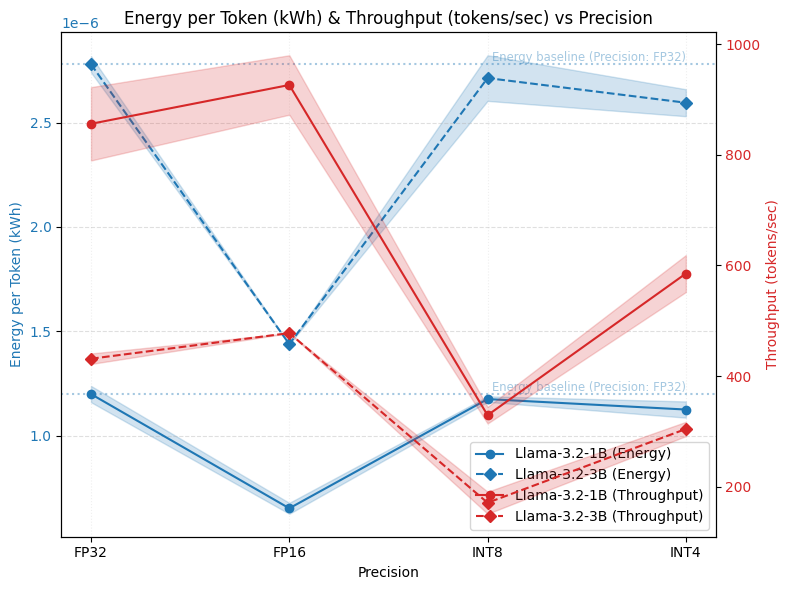

/Users/henrybaker/repositories/thesis_analysis/scripts/c_vis_proc_precis_batch.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats1 = sub.groupby(param_col)[metric_map[ax1]['col']].agg(['mean','std'])
/Users/henrybaker/repositories/thesis_analysis/scripts/c_vis_proc_precis_batch.py:128: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats2 = sub.groupby(param_col)[metric_map[ax2]['col']].agg(['mean','std'])
/Users/henrybaker/repositories/thesis_analysis/scripts/c_vis_proc_precis_batch.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

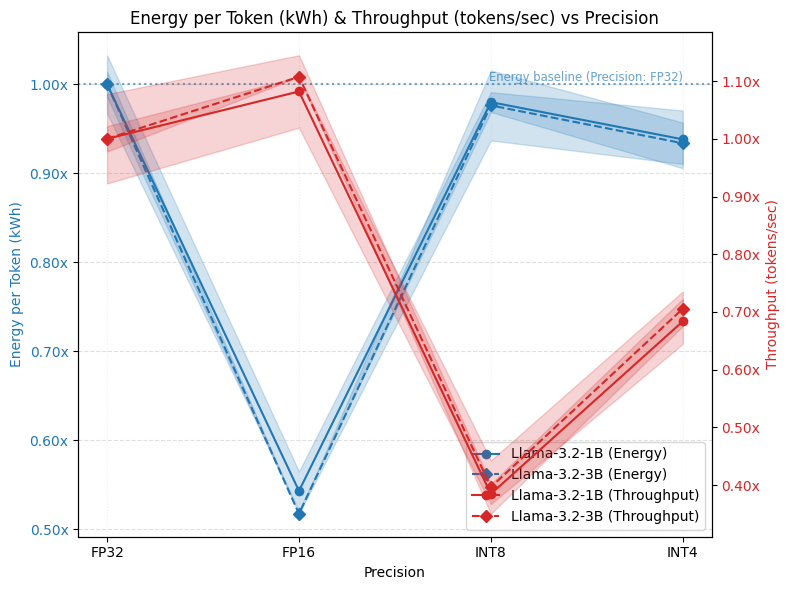

In [29]:
# 3) Precision modes (FP32/FP16/INT8/INT4)
plot_precision(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

## Decoder Plots

### (i) Across Decoder Temperature, grouped  by mode

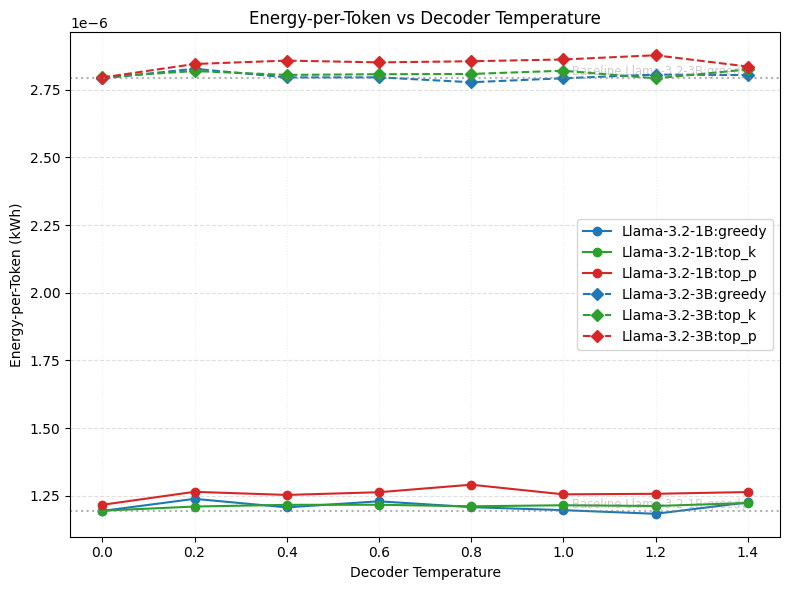

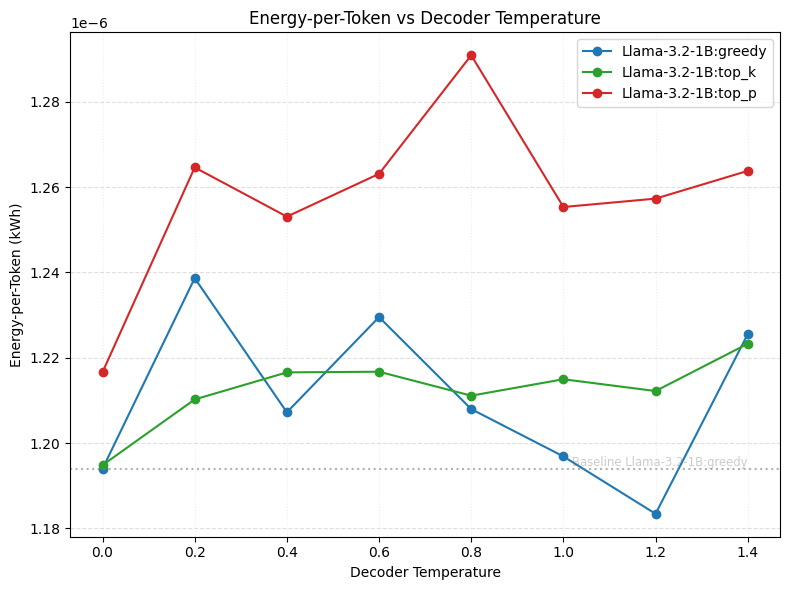

In [30]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


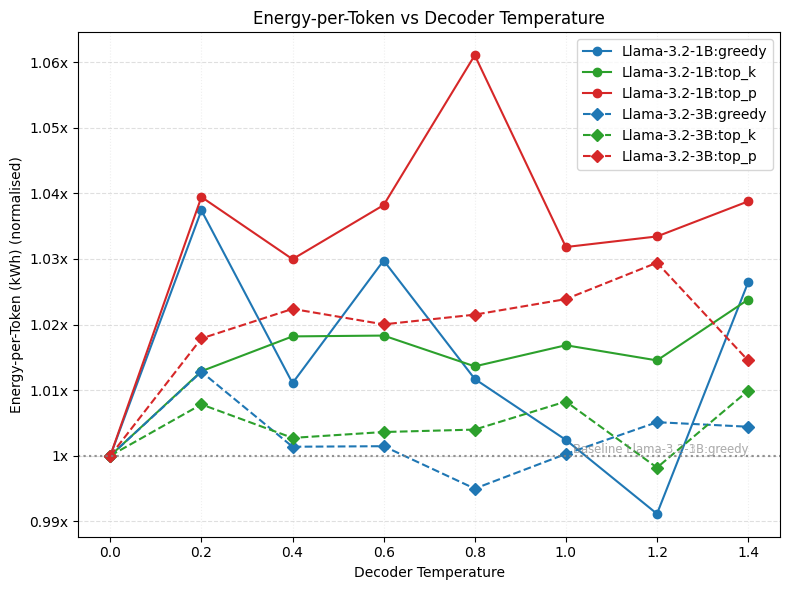

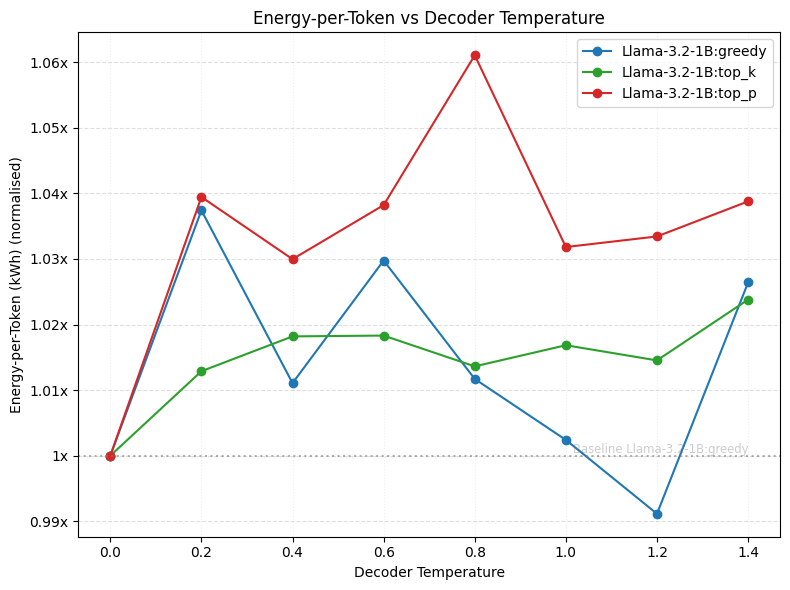

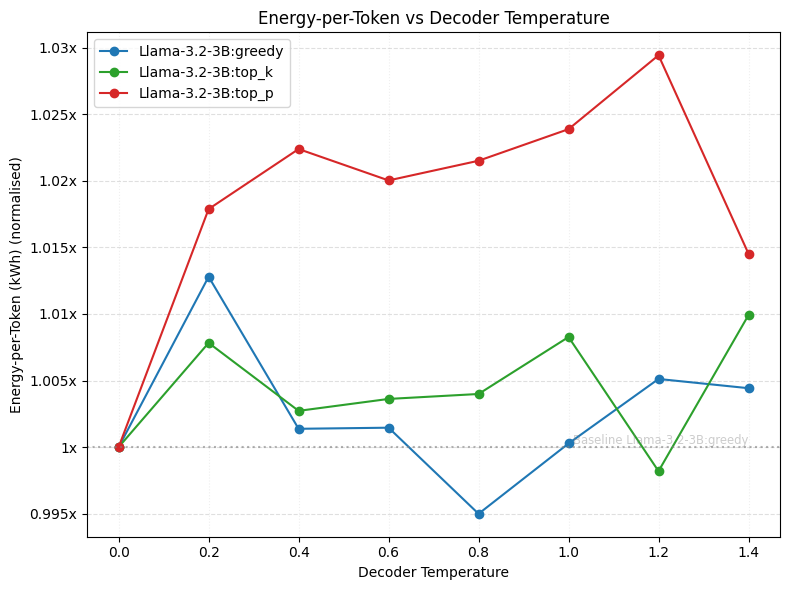

In [31]:
plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

Plotting the meaned stat with 1std is messy: choosing individual runs.

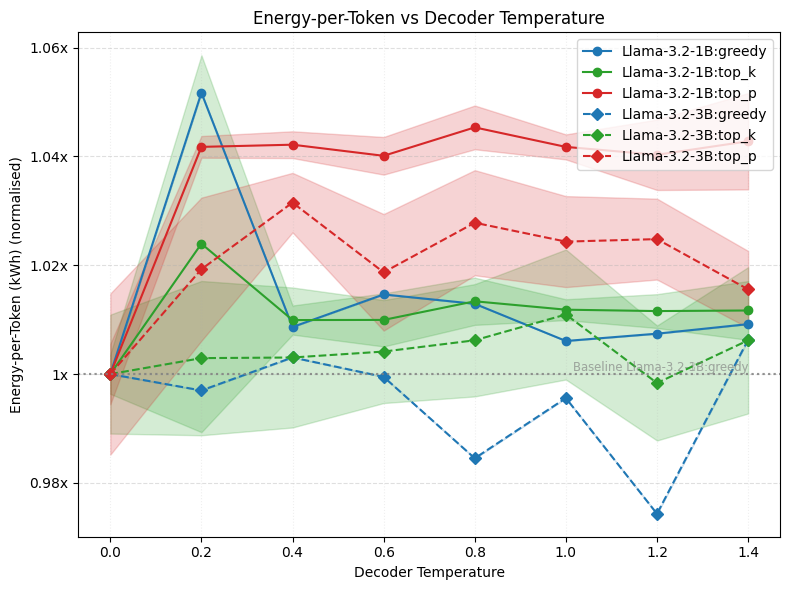

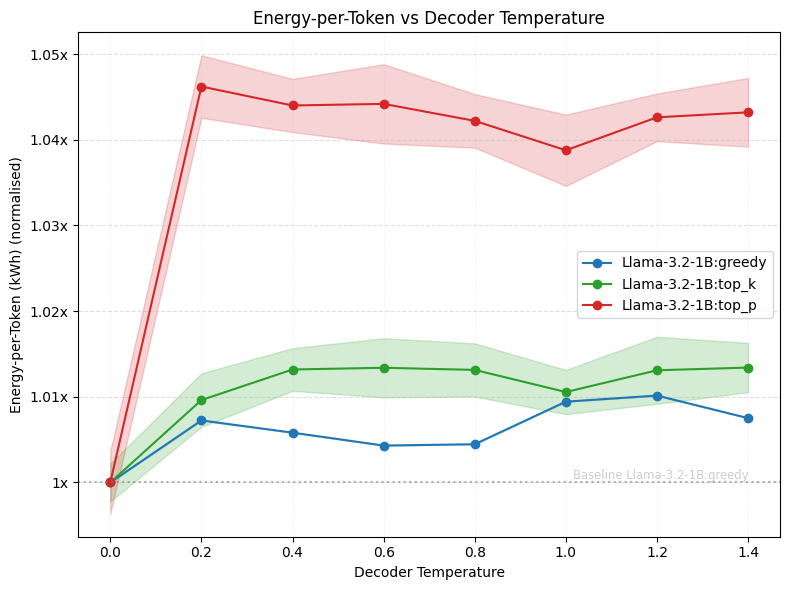

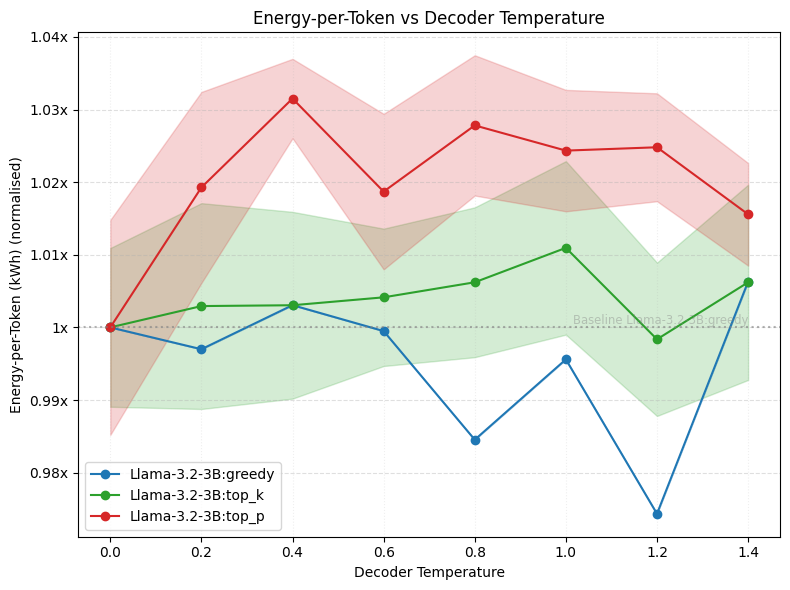

In [32]:
plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

- All of them vs the greedy baseline are higher.
- top p consistenly the highest
- 

to do:
- change the blue label (it's not greedy, it's stochastic???)

### (ii) Across Top-k values, grouped by temperature

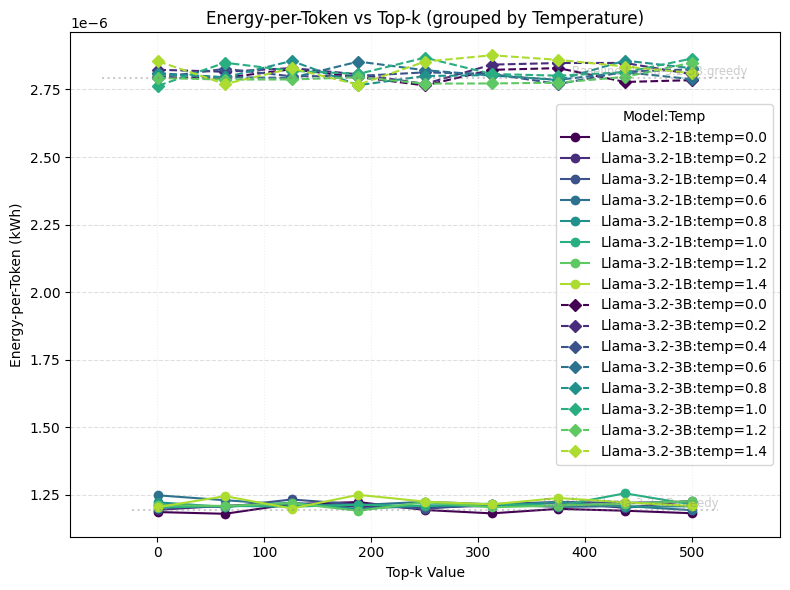

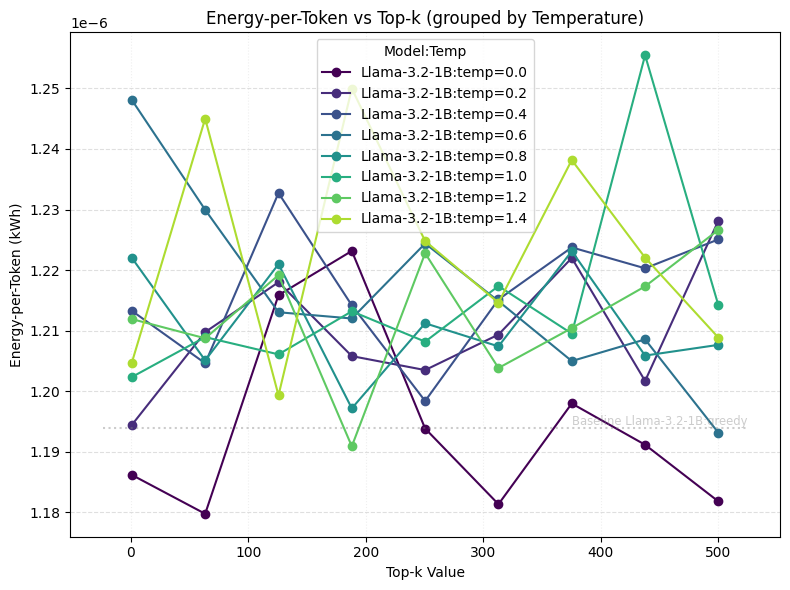

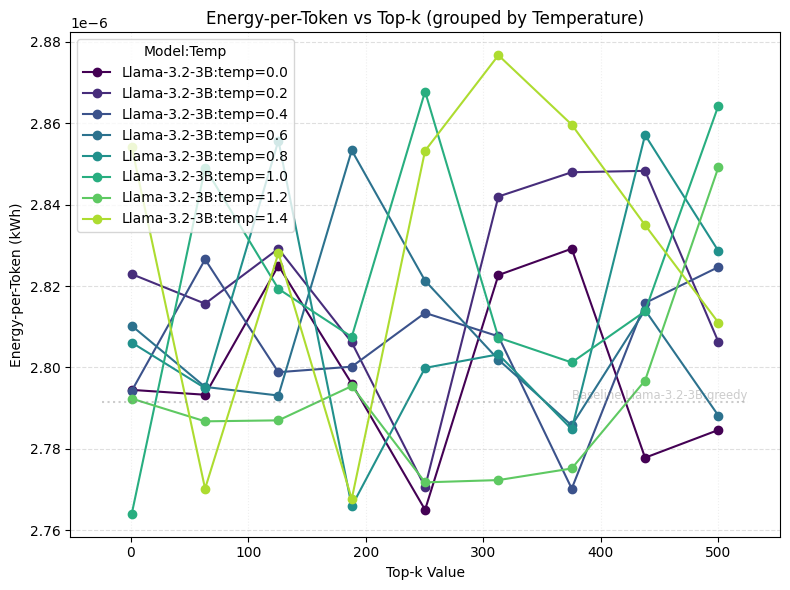

In [33]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature, plot_decoder_top_k

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


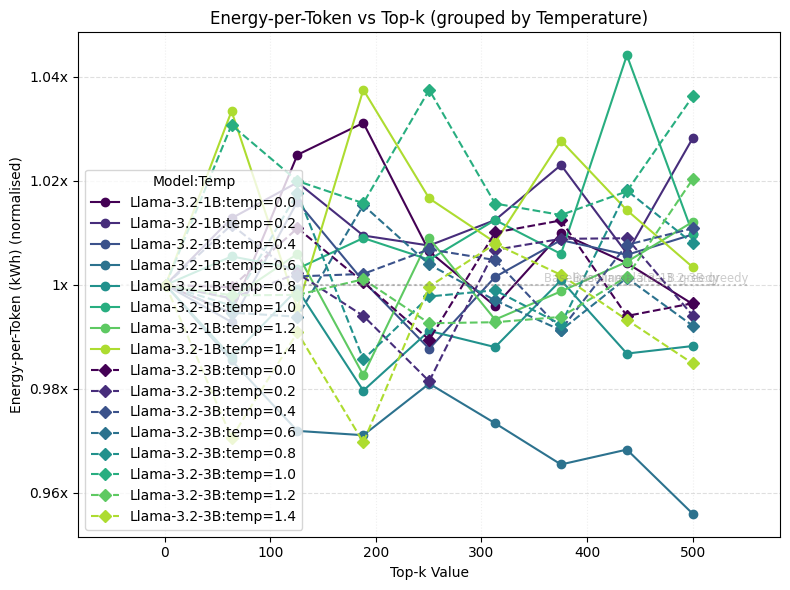

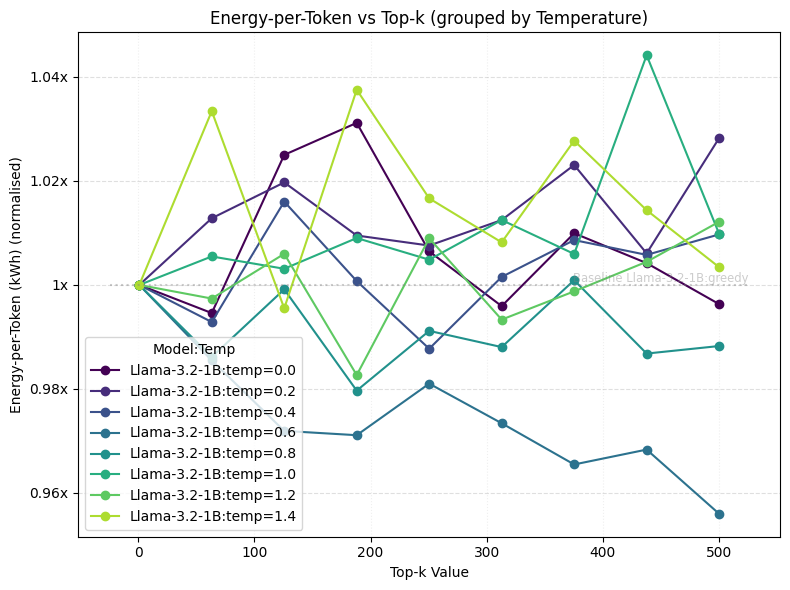

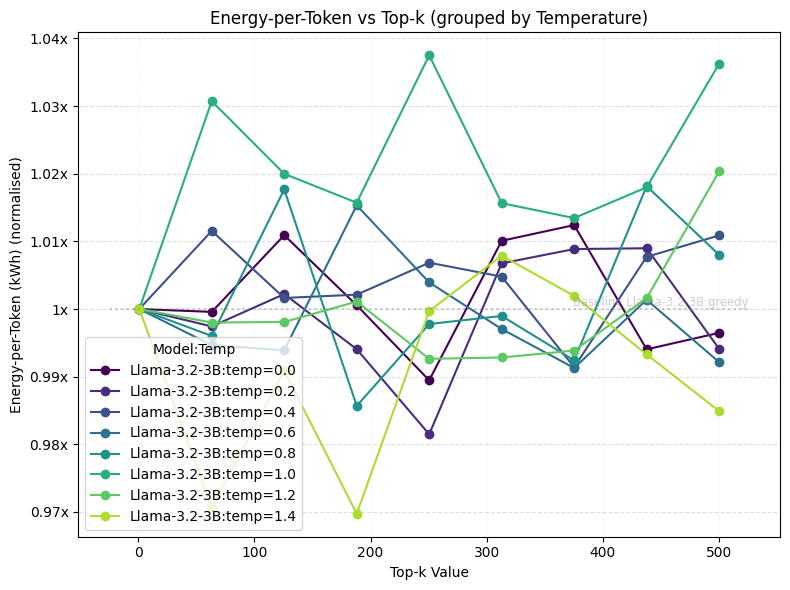

In [34]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

It's pretty much just noise. Trying below with a few selected runs.

1) 1B model

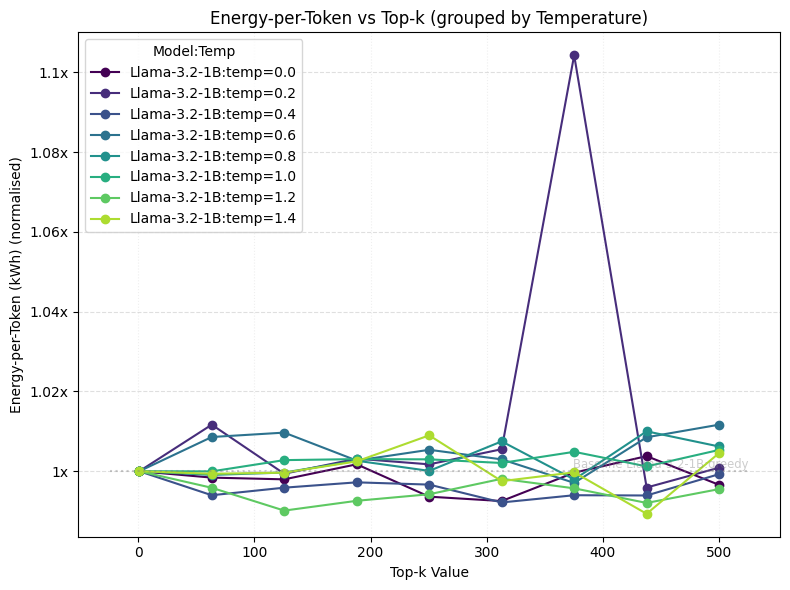

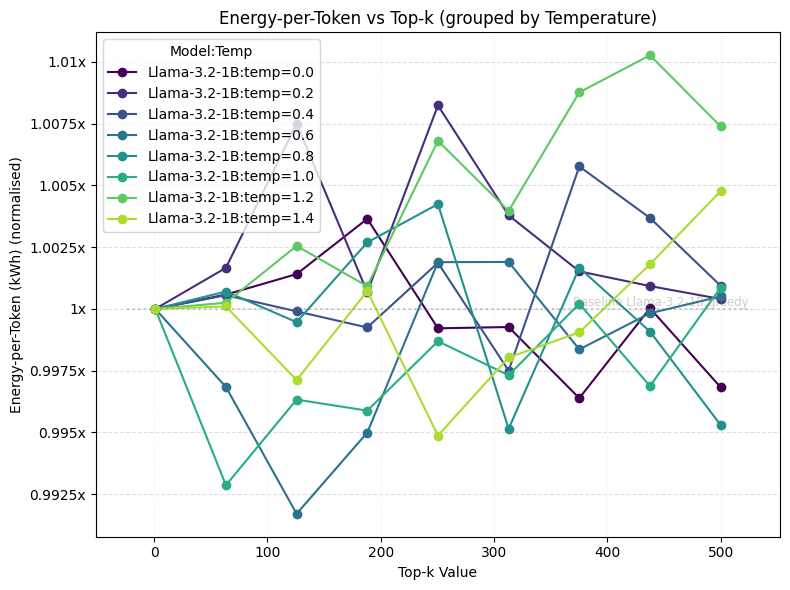

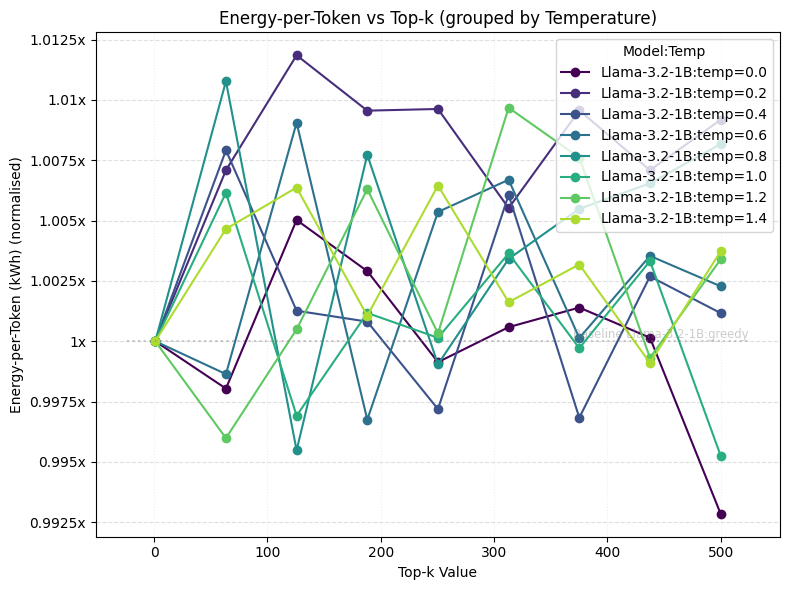

In [35]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=3
    )

2. 3B model

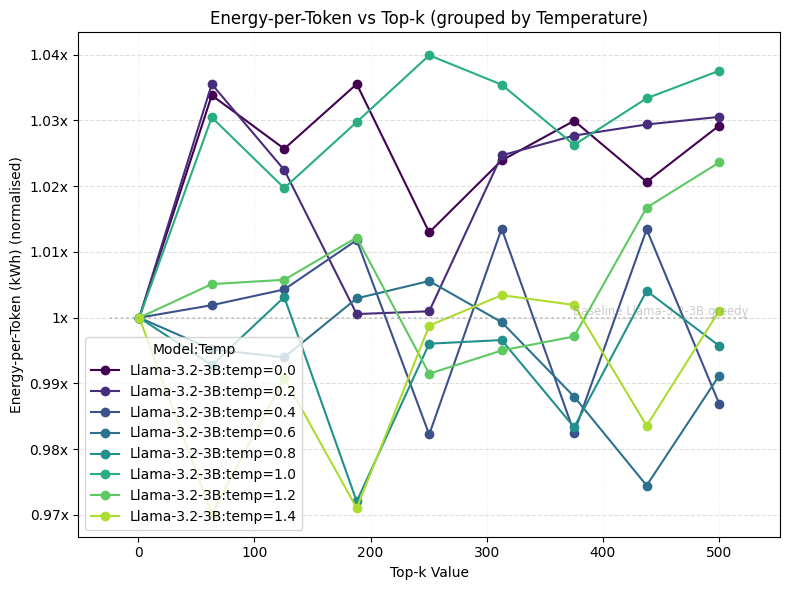

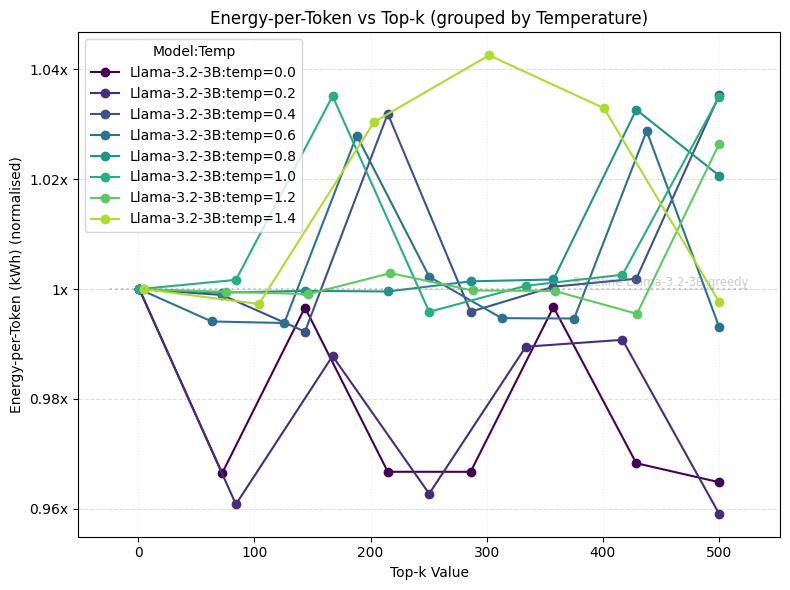

In [36]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

Just noise - no real trends 

### (iii) Across Top-p values, grouped by temperature

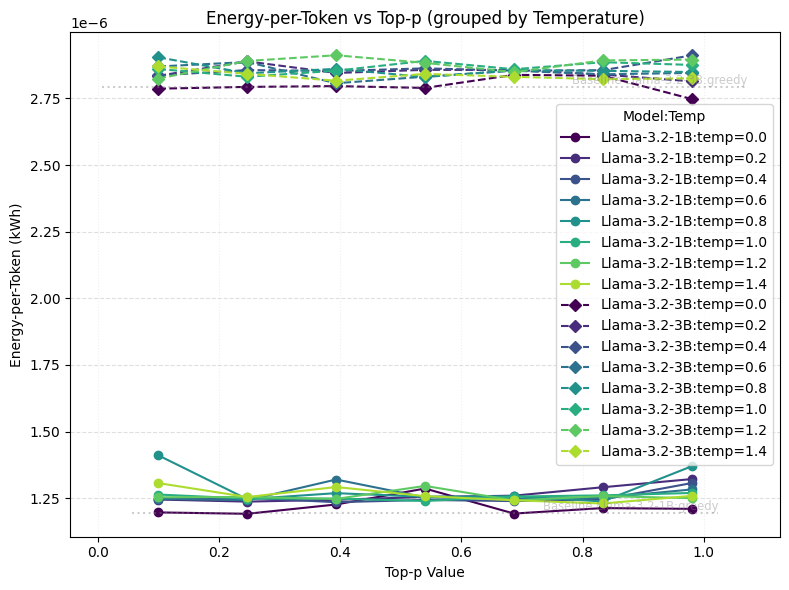

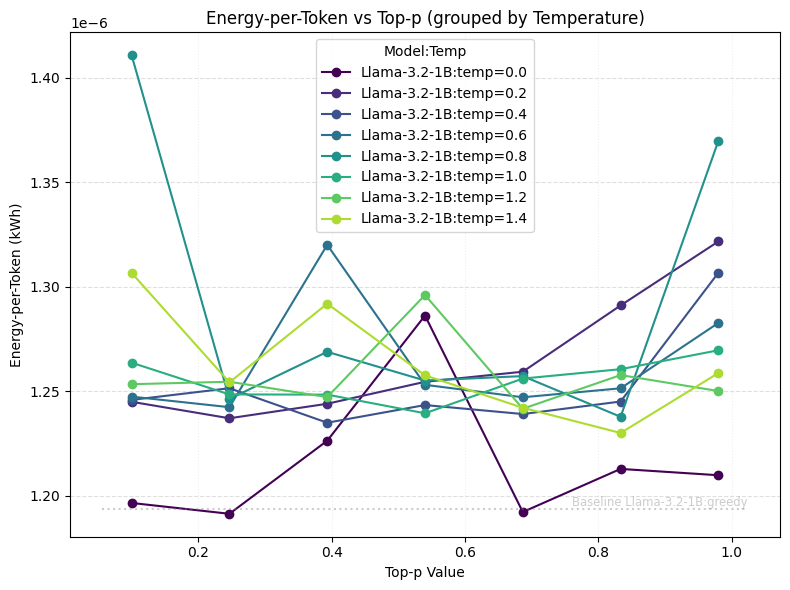

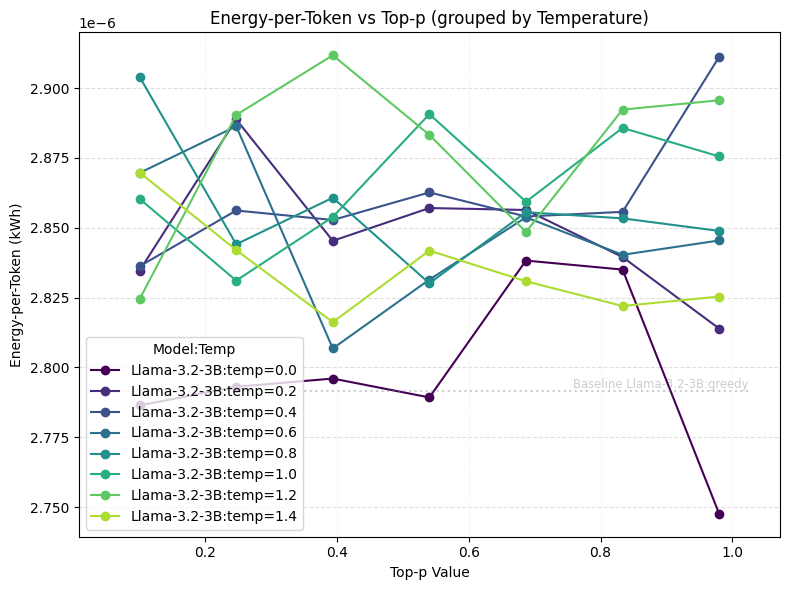

In [37]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature, plot_decoder_top_k, plot_decoder_top_p

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


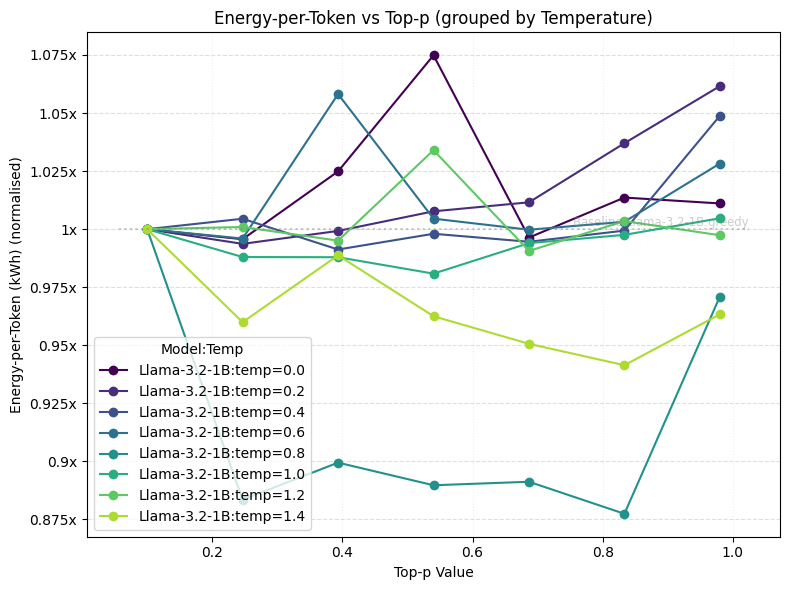

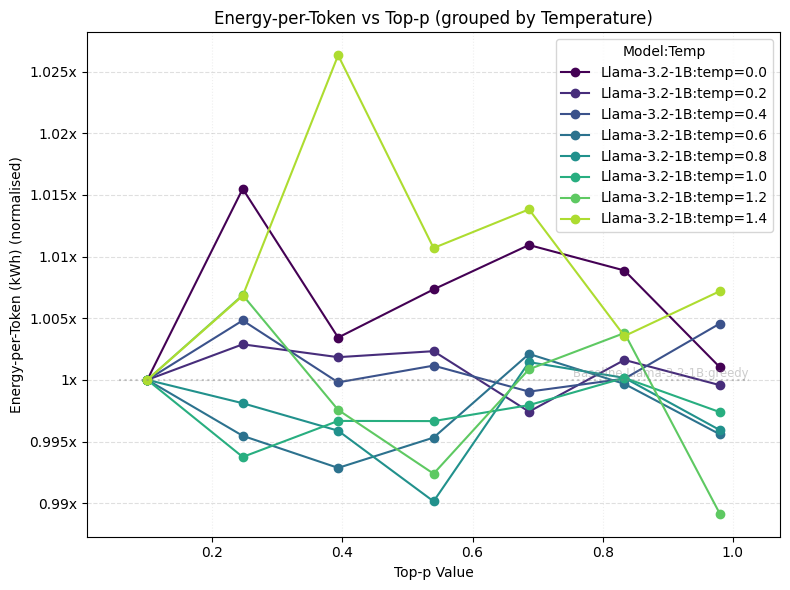

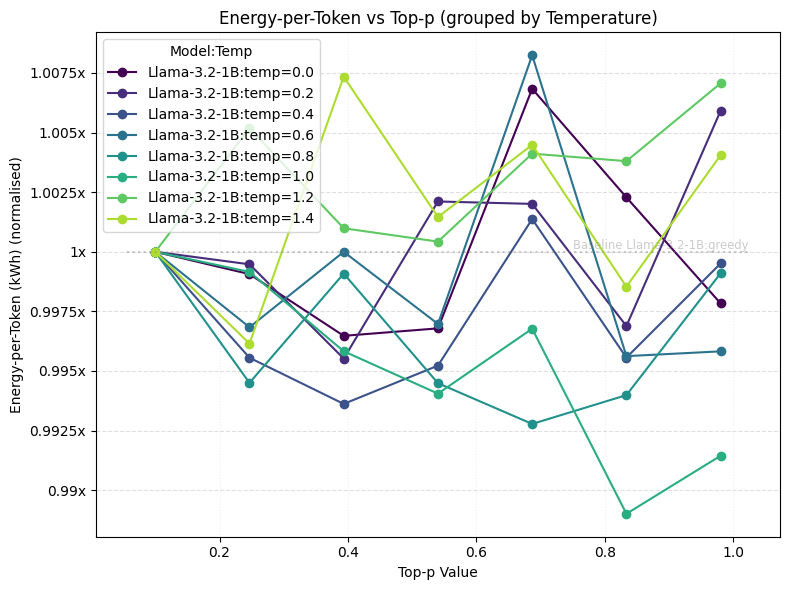

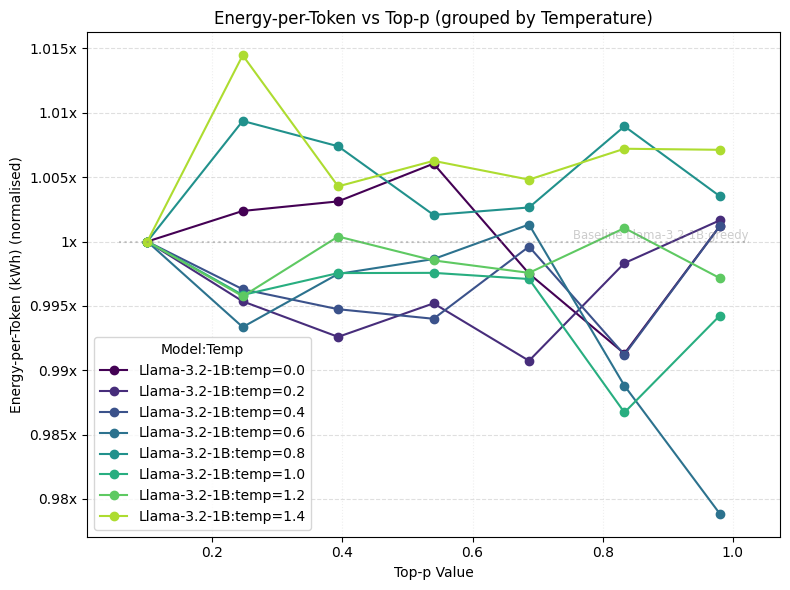

In [38]:
plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=3
    )

Can see that higher temp consistnely have higher energy consumption, but no trend in increasing top p value

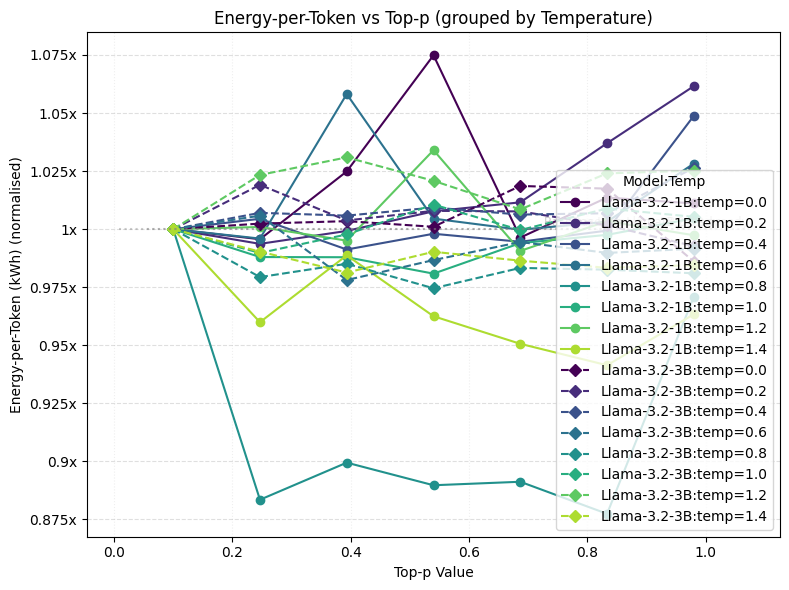

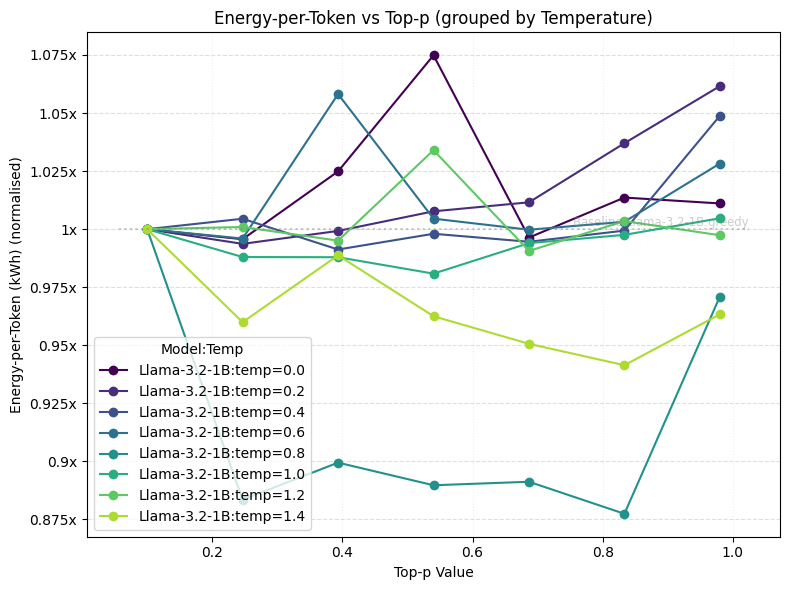

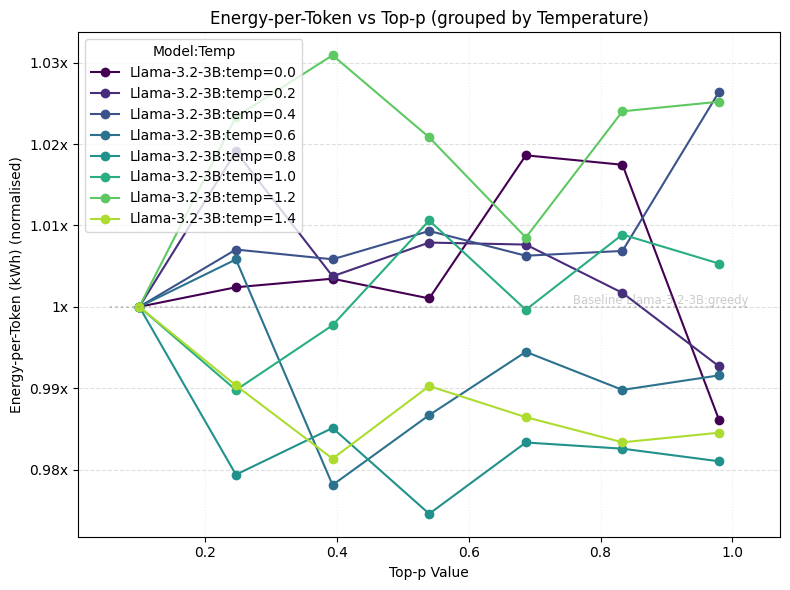

In [39]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature, plot_decoder_top_k, plot_decoder_top_p

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

## Latency Plots

### (i) by burst size

In [40]:
import pandas as pd
import re
import os
import importlib
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')
import numpy as np
import importlib

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

csv_path = f"results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    2682
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Round 1: Verfifying FLOPs on raw df
NB: FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00 5.26385823e+13]
Original distribution:
flops
0.000000e+00       5
1.694997e+13      22
2.024862e+13    2265
5.263858e+13     390
Name: count, dtype: int64

Dominant FLOPs value: 20248623316992.0
- Affected rows count: 417
- Affected row indices: [0, 36, 155, 234, 283, 426, 548, 617, 630, 683, 719, 761, 904, 1000, 1051, 1246, 1294, 1392, 1485, 1531, 1631, 1779, 1815, 2038, 2071, 2214, 2239, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:611: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00 5.26385823e+13]
  if not verify_flops(df):
/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:621: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 5.26385823e+13]
  verify_flops(df)


In [ ]:
import scripts.e_vis_latency as vis_latency
importlib.reload(vis_latency)

from scripts.e_vis_latency import plot_latency_by_burst_size

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
)

plot_latency_by_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_latency_by_burst_size(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

TypeError: plot_latency_by_burst_size() got an unexpected keyword argument 'plot_mean'

In [ ]:
from scripts.OLD_c_controlled_exp_visualisations import plot_latency_by_burst_size, plot_latency_by_burst_interval


# latency 
# - burst size
#plot_latency_by_burst_size(dfs)
#plot_latency_by_burst_size(dfs, normalise_axes=['ax1'])
plot_latency_by_burst_size(dfs, plot_band=False, plot_raw=False)
plot_latency_by_burst_size(dfs, normalise_axes=['ax1'], plot_band=False, plot_raw=True)

# - burst interval
#plot_latency_by_burst_interval(dfs)
#plot_latency_by_burst_interval(dfs, normalise_axes=['ax1'])
plot_latency_by_burst_interval(dfs, plot_band=False, plot_raw=False)
plot_latency_by_burst_interval(dfs, normalise_axes=['ax1'], plot_band=False, plot_raw=True)


### (ii) by burst interal

# Grid search plots

This is different to the controlled experiments, where we kept everything constant and plotted against a (somewhat arbitrary) baseline. This should demonstrate the areas of parameter space (i.e. of a selected variable along the x axis) where there is variation (driven by variation in the other variables)

# Modeling

TO DO: WORK OUT % OF TOTAL ENERGY CONSUMPTION / VARIANCE THAT CAN BE EXPLAINED BY TOTAL CONFIGS CHANGES VS BASELINE THAT IS MODEL DETERMINED

In [ ]:
from scripts.d_base_regression import run_full_regression_analysis, preprocess_data

df = preprocess_data(df)

# With default predictors
run_full_regression_analysis(df)

# With custom predictors
custom_predictors = ["batch_size_numeric", "C(fp_precision)", "C(quantization)"]
run_full_regression_analysis(df, predictors=custom_predictors)


ModuleNotFoundError: No module named 'scripts.d_base_regression'

In [ ]:
%run scripts/d_mixed_effects_model.py

In [ ]:
df.columns

Modelling to do
- [ ] set up hoerarchical model -> identify groupings:
   - [ ] use model (even though currently only one model)
   - [ ] use config_name and date_time
   - [ ] use decoder configs
   - [ ] latency configs 